In [37]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score,davies_bouldin_score
from sklearn.metrics.cluster import rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn_som.som import SOM
from sklearn.cluster import AffinityPropagation

In [2]:

data1, data1_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=7)
data2, data2_y = make_classification(n_samples=400, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=7)
data3, data3_y = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=99)

In [3]:
def show(data, y):
    plt.scatter(data[:, 0], data[:, 1], marker="o", c=y, s=25, edgecolor="k")
    plt.show()

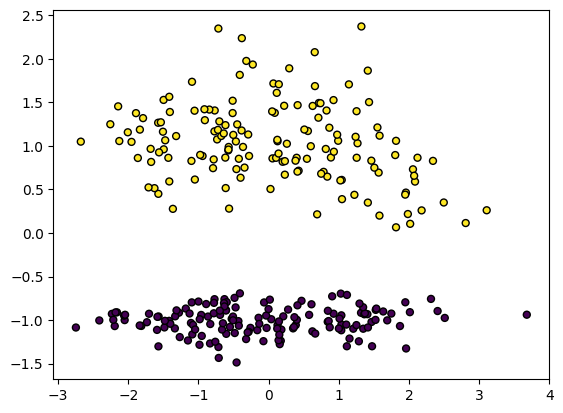

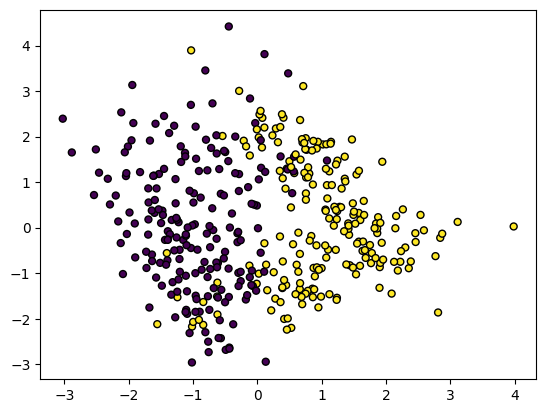

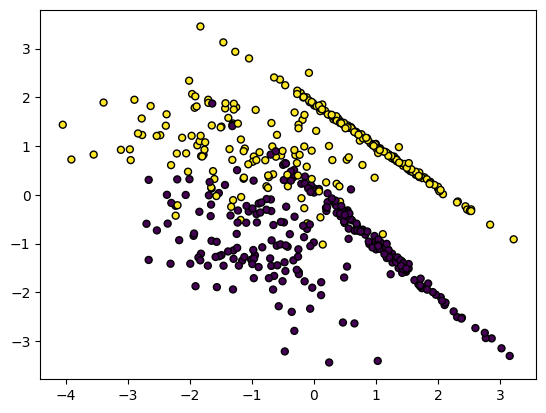

In [4]:
show(data1, data1_y)
show(data2, data2_y)
show(data3, data3_y)

In [5]:
def showmetricks(data, y, pred):
    print("Внешние метрики")
    print(f"Rand score: {rand_score(pred, y)}")
    print(f"Homogeneity Score: {homogeneity_score(pred, y)}")
    print("Внутренние метрики")
    print(f"Silhouette score: {silhouette_score(data, y)}")
    print(f"Davies bouldin score: {davies_bouldin_score(data, y)}")

In [6]:
def kmeans (data: np.ndarray, y: np.ndarray):
    kmeans = KMeans(2, n_init='auto').fit(data)

    plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
    
    plt.show()


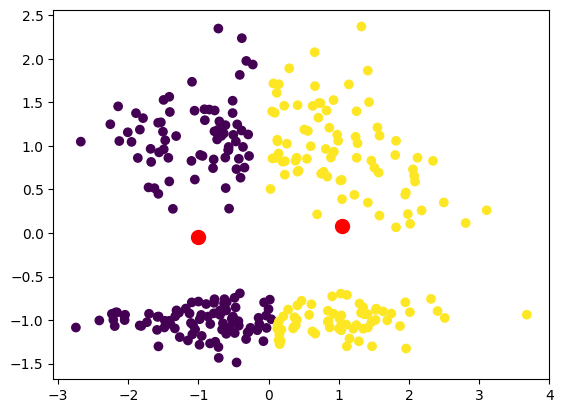

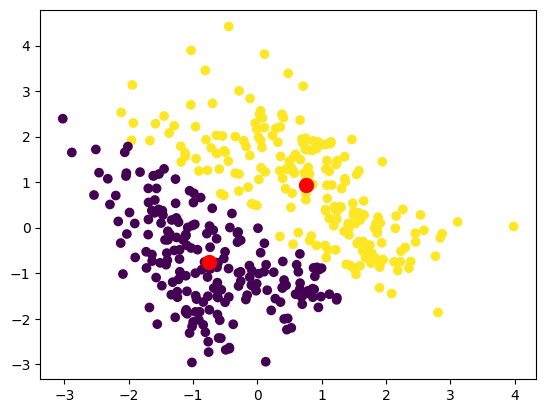

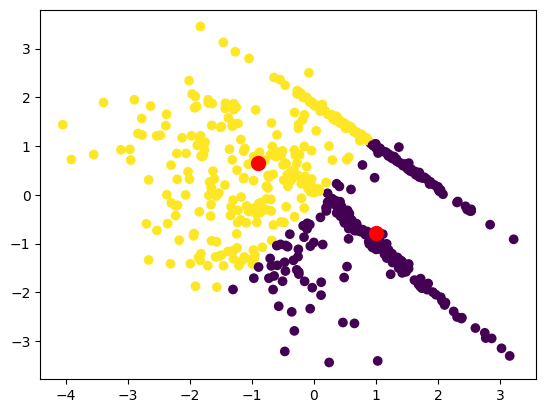

In [7]:
kmeans(data1, data1_y)
kmeans(data2, data2_y)
kmeans(data3, data3_y)

In [8]:
def LokotKMeans(data):
    inertias = []
    for i in range(2, 10):
        m = KMeans(i, n_init='auto').fit(data)
        inertias.append(m.inertia_)
    plt.plot(range(2,10), inertias)
    plt.show()

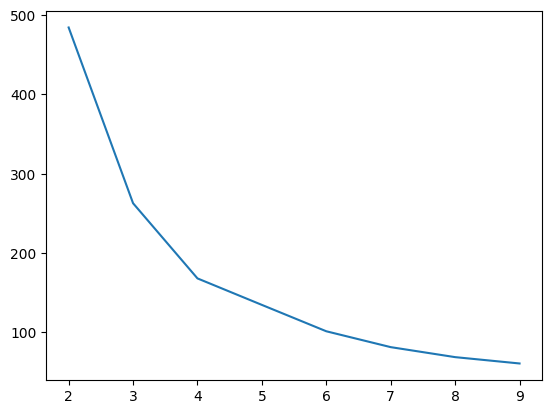

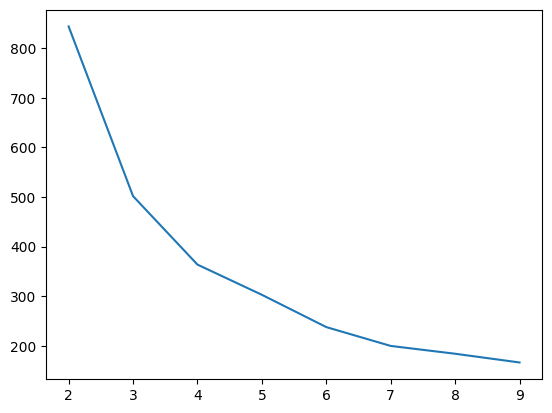

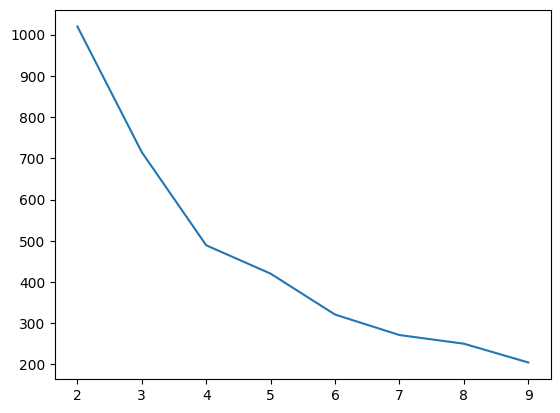

In [9]:
LokotKMeans(data1)
LokotKMeans(data2)
LokotKMeans(data3)

In [10]:
def silhouette(data):
    ss = []
    for i in range(2, 10):
        ss.append(silhouette_score(data, KMeans(i, n_init='auto').fit(data).labels_))
    plt.plot(range(2,10), ss)
    plt.show()

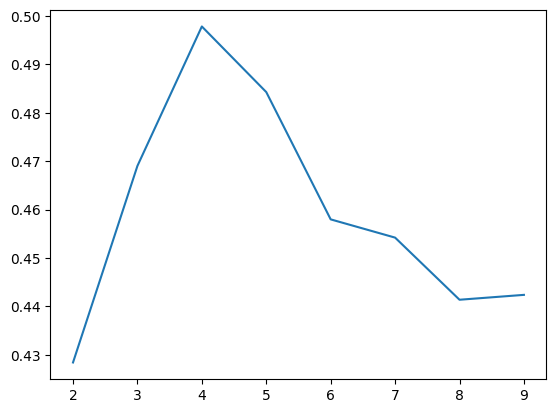

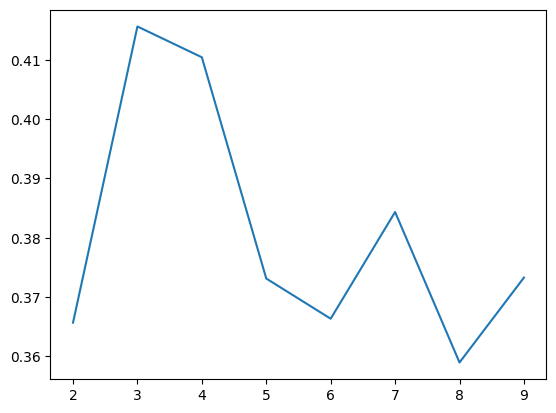

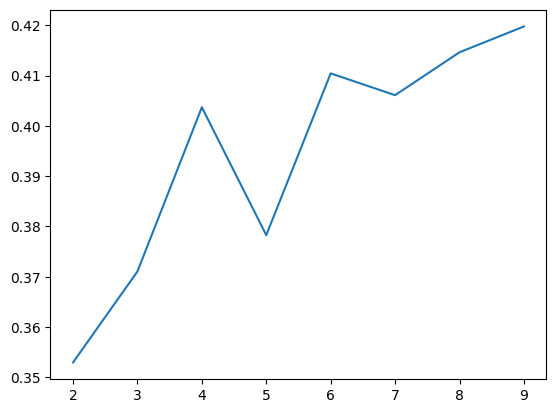

In [11]:
silhouette(data1)
silhouette(data2)
silhouette(data3)

In [12]:
def nearestNeighbors(data):
    nbrs = NearestNeighbors(n_neighbors=7).fit(data)
    distances, indices = nbrs.kneighbors(data)

    distances = np.mean(distances, axis=1)
    distances = np.sort(distances)
    plt.plot(distances)
    plt.show()


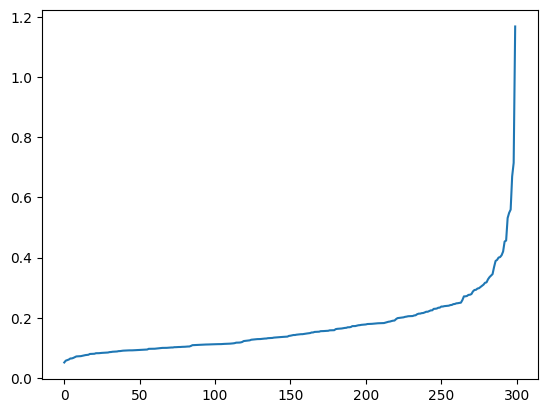

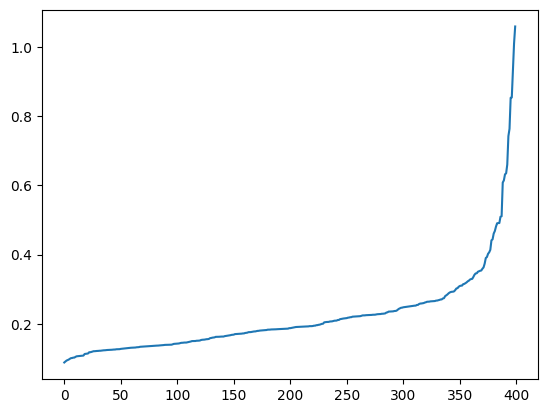

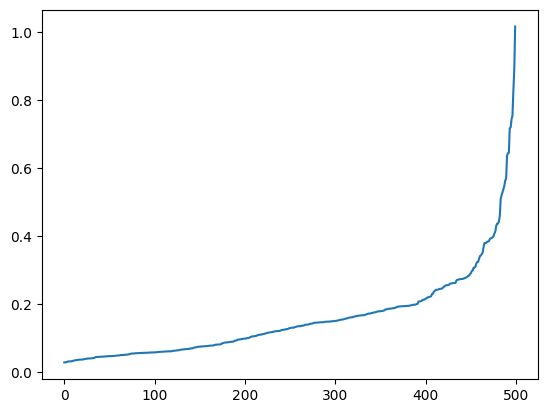

In [13]:
nearestNeighbors(data1)
nearestNeighbors(data2)
nearestNeighbors(data3)

In [14]:
def dbscanscan(data, y):
    dbscan = DBSCAN(eps=0.1, min_samples=4).fit(data)
    plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)
    showmetricks(data,y ,dbscan.labels_)
    plt.show()

Внешние метрики
Rand score: 0.5342920847268673
Homogeneity Score: 0.16537176048097318
Внутренние метрики
Silhouette score: 0.4283999957162528
Davies bouldin score: 1.0662721050992308


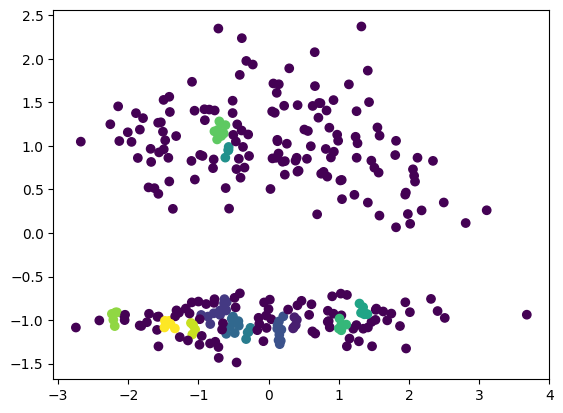

Внешние метрики
Rand score: 0.5022681704260652
Homogeneity Score: 0.1290618890744667
Внутренние метрики
Silhouette score: 0.27686766626269843
Davies bouldin score: 1.46347786538574


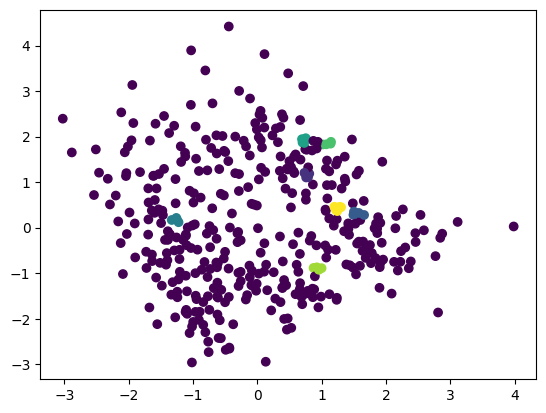

Внешние метрики
Rand score: 0.5600400801603206
Homogeneity Score: 0.19553029335079486
Внутренние метрики
Silhouette score: 0.2783762084180291
Davies bouldin score: 1.4132743562150314


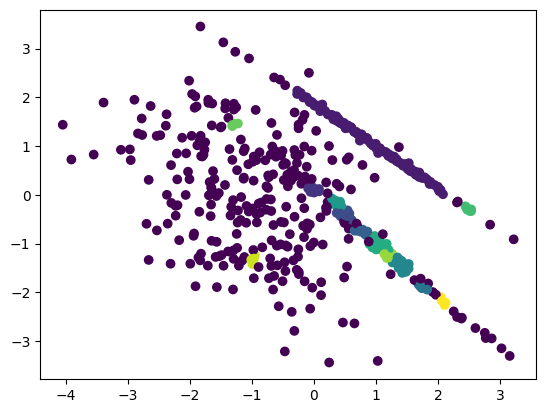

In [15]:
dbscanscan(data1, data1_y)
dbscanscan(data2, data2_y)
dbscanscan(data3, data3_y)

In [16]:
def GausMixture(data, y):
    gm = GaussianMixture(n_components=4).fit(data)

    pred = gm.predict(data)

    plt.scatter(data[:,0], data[:,1], c=gm.predict(data))
    plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')
    showmetricks(data, y, pred)
    plt.show()

Внешние метрики
Rand score: 0.7518617614269788
Homogeneity Score: 0.5019542461939238
Внутренние метрики
Silhouette score: 0.4283999957162528
Davies bouldin score: 1.0662721050992308


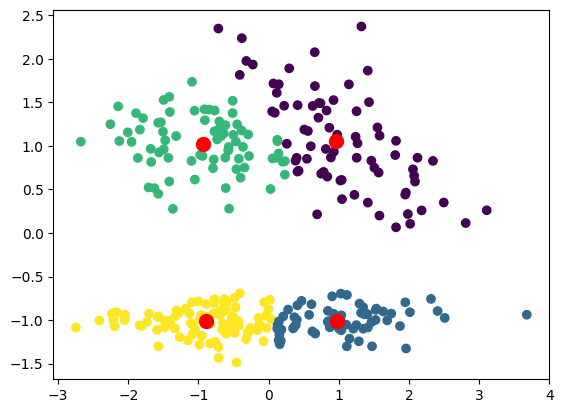

Внешние метрики
Rand score: 0.6576691729323308
Homogeneity Score: 0.26751860799726834
Внутренние метрики
Silhouette score: 0.27686766626269843
Davies bouldin score: 1.46347786538574


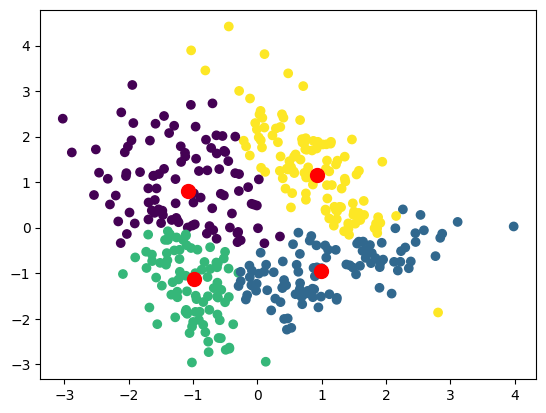

Внешние метрики
Rand score: 0.6873507014028056
Homogeneity Score: 0.3354607882347223
Внутренние метрики
Silhouette score: 0.2783762084180291
Davies bouldin score: 1.4132743562150314


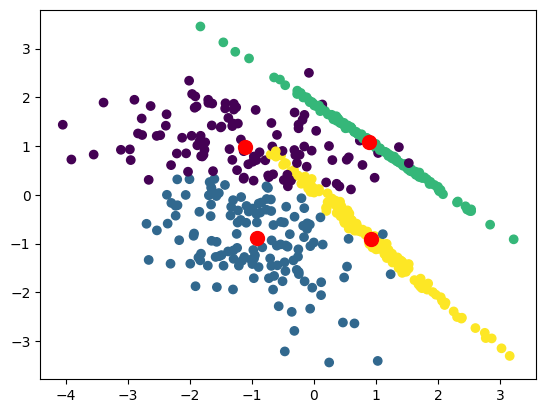

In [17]:
GausMixture(data1, data1_y)
GausMixture(data2, data2_y)
GausMixture(data3, data3_y)

In [21]:
def Hierarchy(data):
    clusters = hierarchy.linkage(data, method="ward")
    plt.figure(figsize=(10, 6))
    dendrogram = hierarchy.dendrogram(clusters)
    plt.axhline(25, color='red', linestyle='--'); 
    plt.axhline(15, color='crimson')
    plt.show()

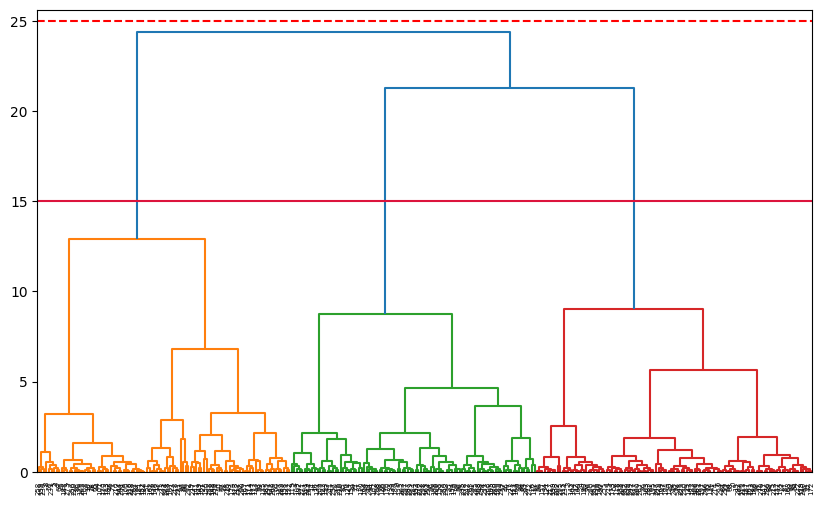

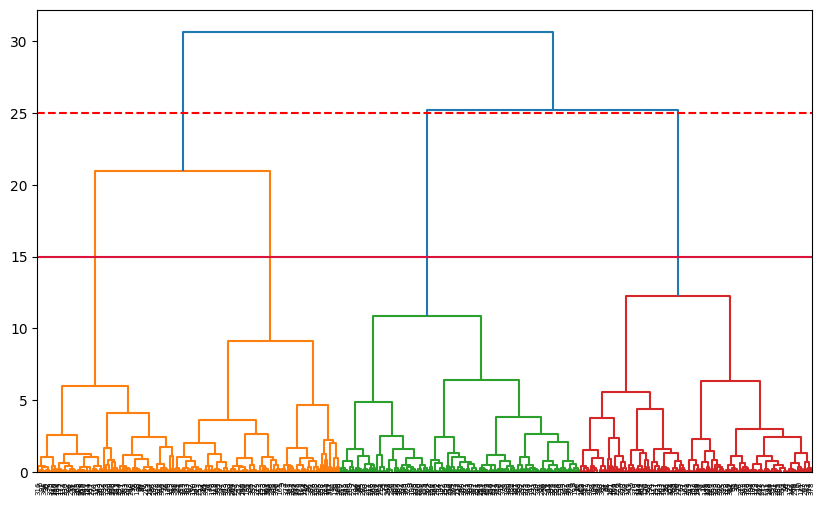

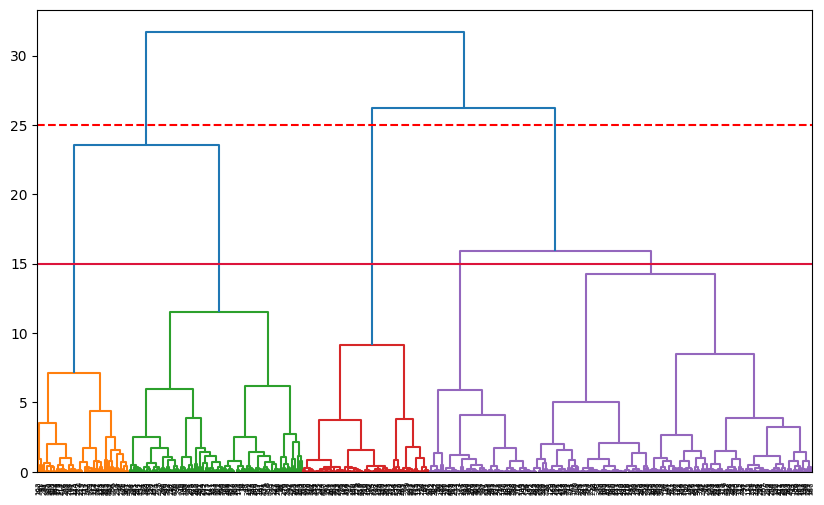

In [22]:
Hierarchy(data1)
Hierarchy(data2)
Hierarchy(data3)

In [ ]:
def agglomerativeClustering(data, y):
    clustering = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(data)
    plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
    showmetricks(data, y, clustering.labels_)
    plt.show()

Внешние метрики
Rand score: 0.7787513935340022
Homogeneity Score: 0.5122861608527156
Внутренние метрики
Silhouette score: 0.4283999957162528
Davies bouldin score: 1.0662721050992308


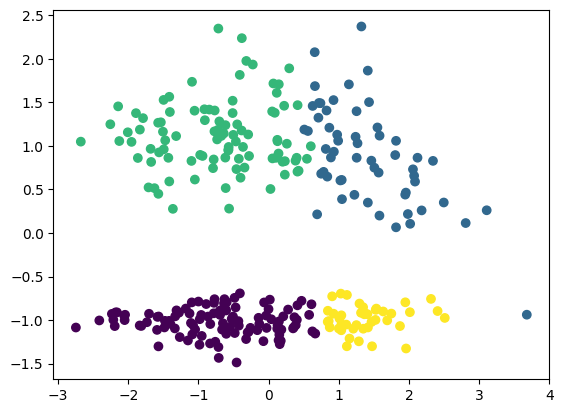

Внешние метрики
Rand score: 0.6244736842105263
Homogeneity Score: 0.2406199025830572
Внутренние метрики
Silhouette score: 0.27686766626269843
Davies bouldin score: 1.46347786538574


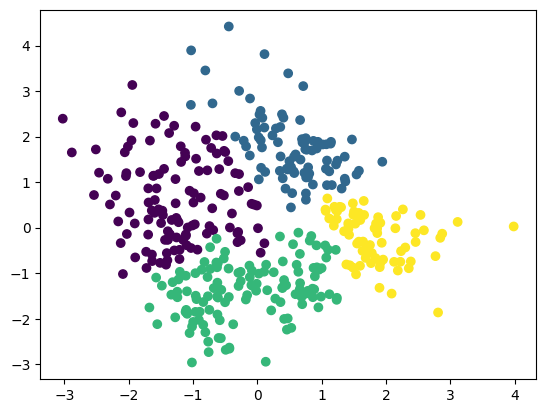

Внешние метрики
Rand score: 0.6300521042084168
Homogeneity Score: 0.24348614109245806
Внутренние метрики
Silhouette score: 0.2783762084180291
Davies bouldin score: 1.4132743562150314


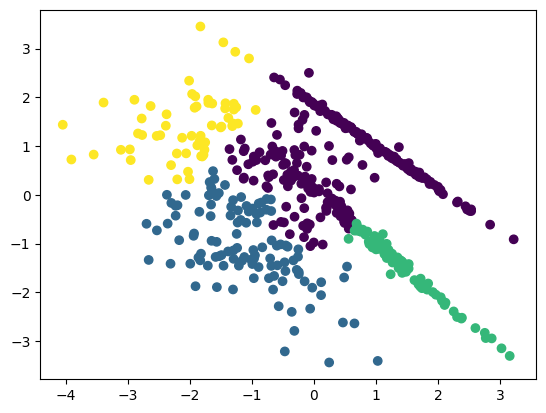

In [ ]:
agglomerativeClustering(data1, data1_y)
agglomerativeClustering(data2, data2_y)
agglomerativeClustering(data3, data3_y)

In [35]:
def soma(data, y):
    som = SOM(m=4, n=1, dim=2)
    som.fit(data)
    predictions = som.predict(data)
    plt.scatter(data[:,0], data[:,1], c=predictions)
    showmetricks(data, y, predictions)
    plt.show()

Внешние метрики
Rand score: 0.752396878483835
Homogeneity Score: 0.5023403339620673
Внутренние метрики
Silhouette score: 0.4283999957162528
Davies bouldin score: 1.0662721050992308


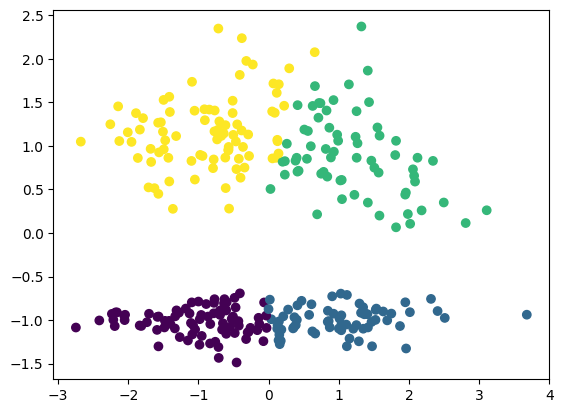

Внешние метрики
Rand score: 0.6199874686716792
Homogeneity Score: 0.21630034798950964
Внутренние метрики
Silhouette score: 0.27686766626269843
Davies bouldin score: 1.46347786538574


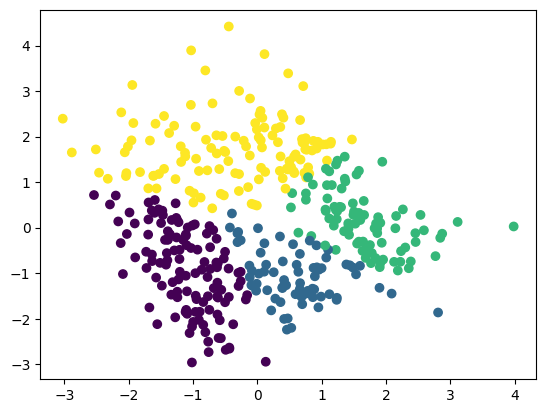

Внешние метрики
Rand score: 0.5896993987975951
Homogeneity Score: 0.13527337285607116
Внутренние метрики
Silhouette score: 0.2783762084180291
Davies bouldin score: 1.4132743562150314


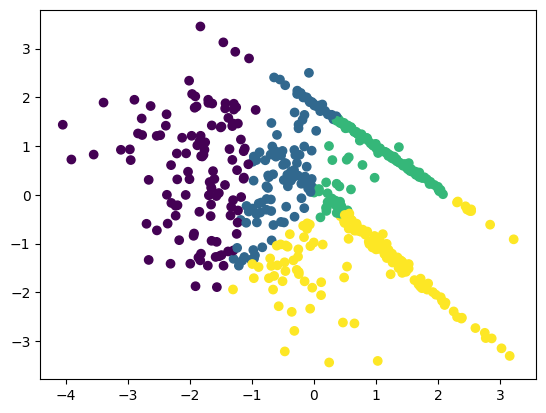

In [36]:
soma(data1, data1_y)
soma(data2, data2_y)
soma(data3, data3_y)

In [40]:
def afini(data, y):
    clustering = AffinityPropagation().fit(data)

    plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
    plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')
    showmetricks(data, y, clustering.labels_)
    plt.show()

Внешние метрики
Rand score: 0.5873801560758083
Homogeneity Score: 0.28304503012811055
Внутренние метрики
Silhouette score: 0.4283999957162528
Davies bouldin score: 1.0662721050992308


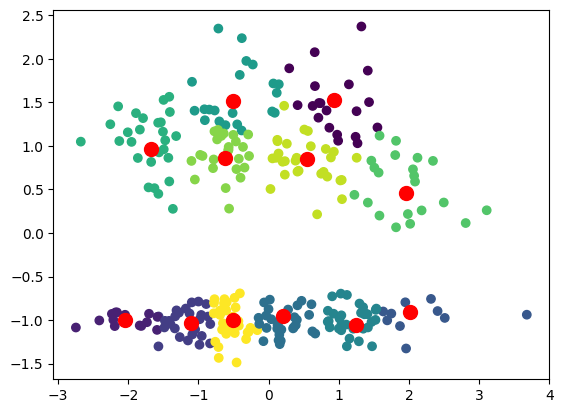

Внешние метрики
Rand score: 0.5442982456140351
Homogeneity Score: 0.16542452754165146
Внутренние метрики
Silhouette score: 0.27686766626269843
Davies bouldin score: 1.46347786538574


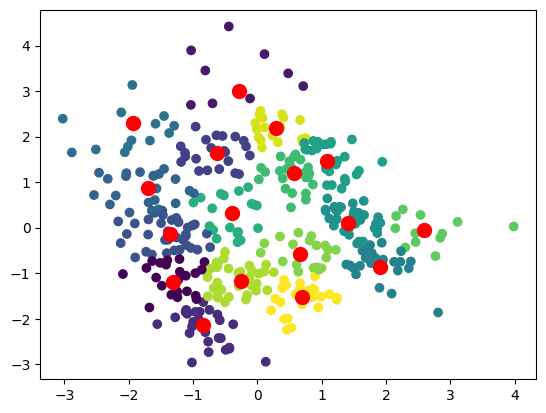

Внешние метрики
Rand score: 0.5405531062124248
Homogeneity Score: 0.1686910225518706
Внутренние метрики
Silhouette score: 0.2783762084180291
Davies bouldin score: 1.4132743562150314


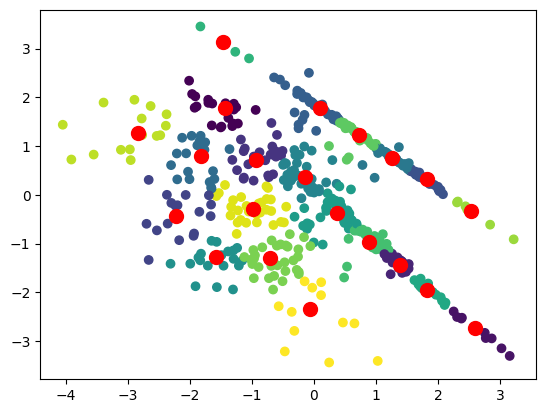

In [41]:
afini(data1, data1_y)
afini(data2, data2_y)
afini(data3, data3_y)